In [1]:
import pygmt

## Setting up colors and corresponding countries 
Here we take the advantage of Python's dictionary data structure!

In [2]:
color_dict = {'MX,BR,CR,DO':    '#CD5C5C',        # mexico, brazil, costa rica, dominican
              'GT,JM,VE,GF,BS': 'pink',           # guatemala, venezuela, jamaica, french guiana, bahamas
              'US,PR,NI,GY':    '240/230/140',    # united states, puerto rico, nicaragua, guyana
              'BZ,HT,TT,PA,SV': '0/36/74/4',      # belize, haiti, trinidad and tobago, panama, salvador
              'CO,CU,HN,SR':    '97-0.52-0.94'}   # colombia, cuba, honduras, suriname

color0 = '169'  # other countries
dcw_list = [key + '+g' + value for key, value in color_dict.items()]
print(dcw_list)

['MX,BR,CR,DO+g#CD5C5C', 'GT,JM,VE,GF,BS+gpink', 'US,PR,NI,GY+g240/230/140', 'BZ,HT,TT,PA,SV+g0/36/74/4', 'CO,CU,HN,SR+g97-0.52-0.94']


In [3]:
# Get the Earth relief data

region = [-100, -50,  1, 34]
grid = pygmt.datasets.load_earth_relief(resolution='05m', region=region)
grid

<xarray.DataArray 'elevation' (lat: 396, lon: 600)>
array([[-3.4285e+03, -3.4330e+03, -3.4290e+03, ...,  8.5000e+00,
         6.0000e+00,  1.4000e+01],
       [-3.6600e+03, -3.6085e+03, -3.5245e+03, ...,  5.0000e+00,
         4.5000e+00,  1.3000e+01],
       [-3.4810e+03, -3.5685e+03, -3.5340e+03, ...,  5.0000e+00,
         3.5000e+00,  5.0000e-01],
       ...,
       [ 5.0600e+02,  4.6300e+02,  4.4500e+02, ..., -5.1355e+03,
        -4.3230e+03, -4.5260e+03],
       [ 4.6400e+02,  4.5000e+02,  4.5400e+02, ..., -4.6930e+03,
        -4.9025e+03, -4.7960e+03],
       [ 4.9250e+02,  4.9700e+02,  4.7650e+02, ..., -4.6955e+03,
        -4.7825e+03, -4.6855e+03]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -99.96 -99.88 -99.79 -99.71 ... -50.21 -50.12 -50.04
  * lat      (lat) float64 1.042 1.125 1.208 1.292 ... 33.71 33.79 33.88 33.96
Attributes:
    long_name:         elevation relative to the geoid
    units:             meters
    vertical_datum:    EMG96
    horizontal_datum:  WGS84

## Plotting 

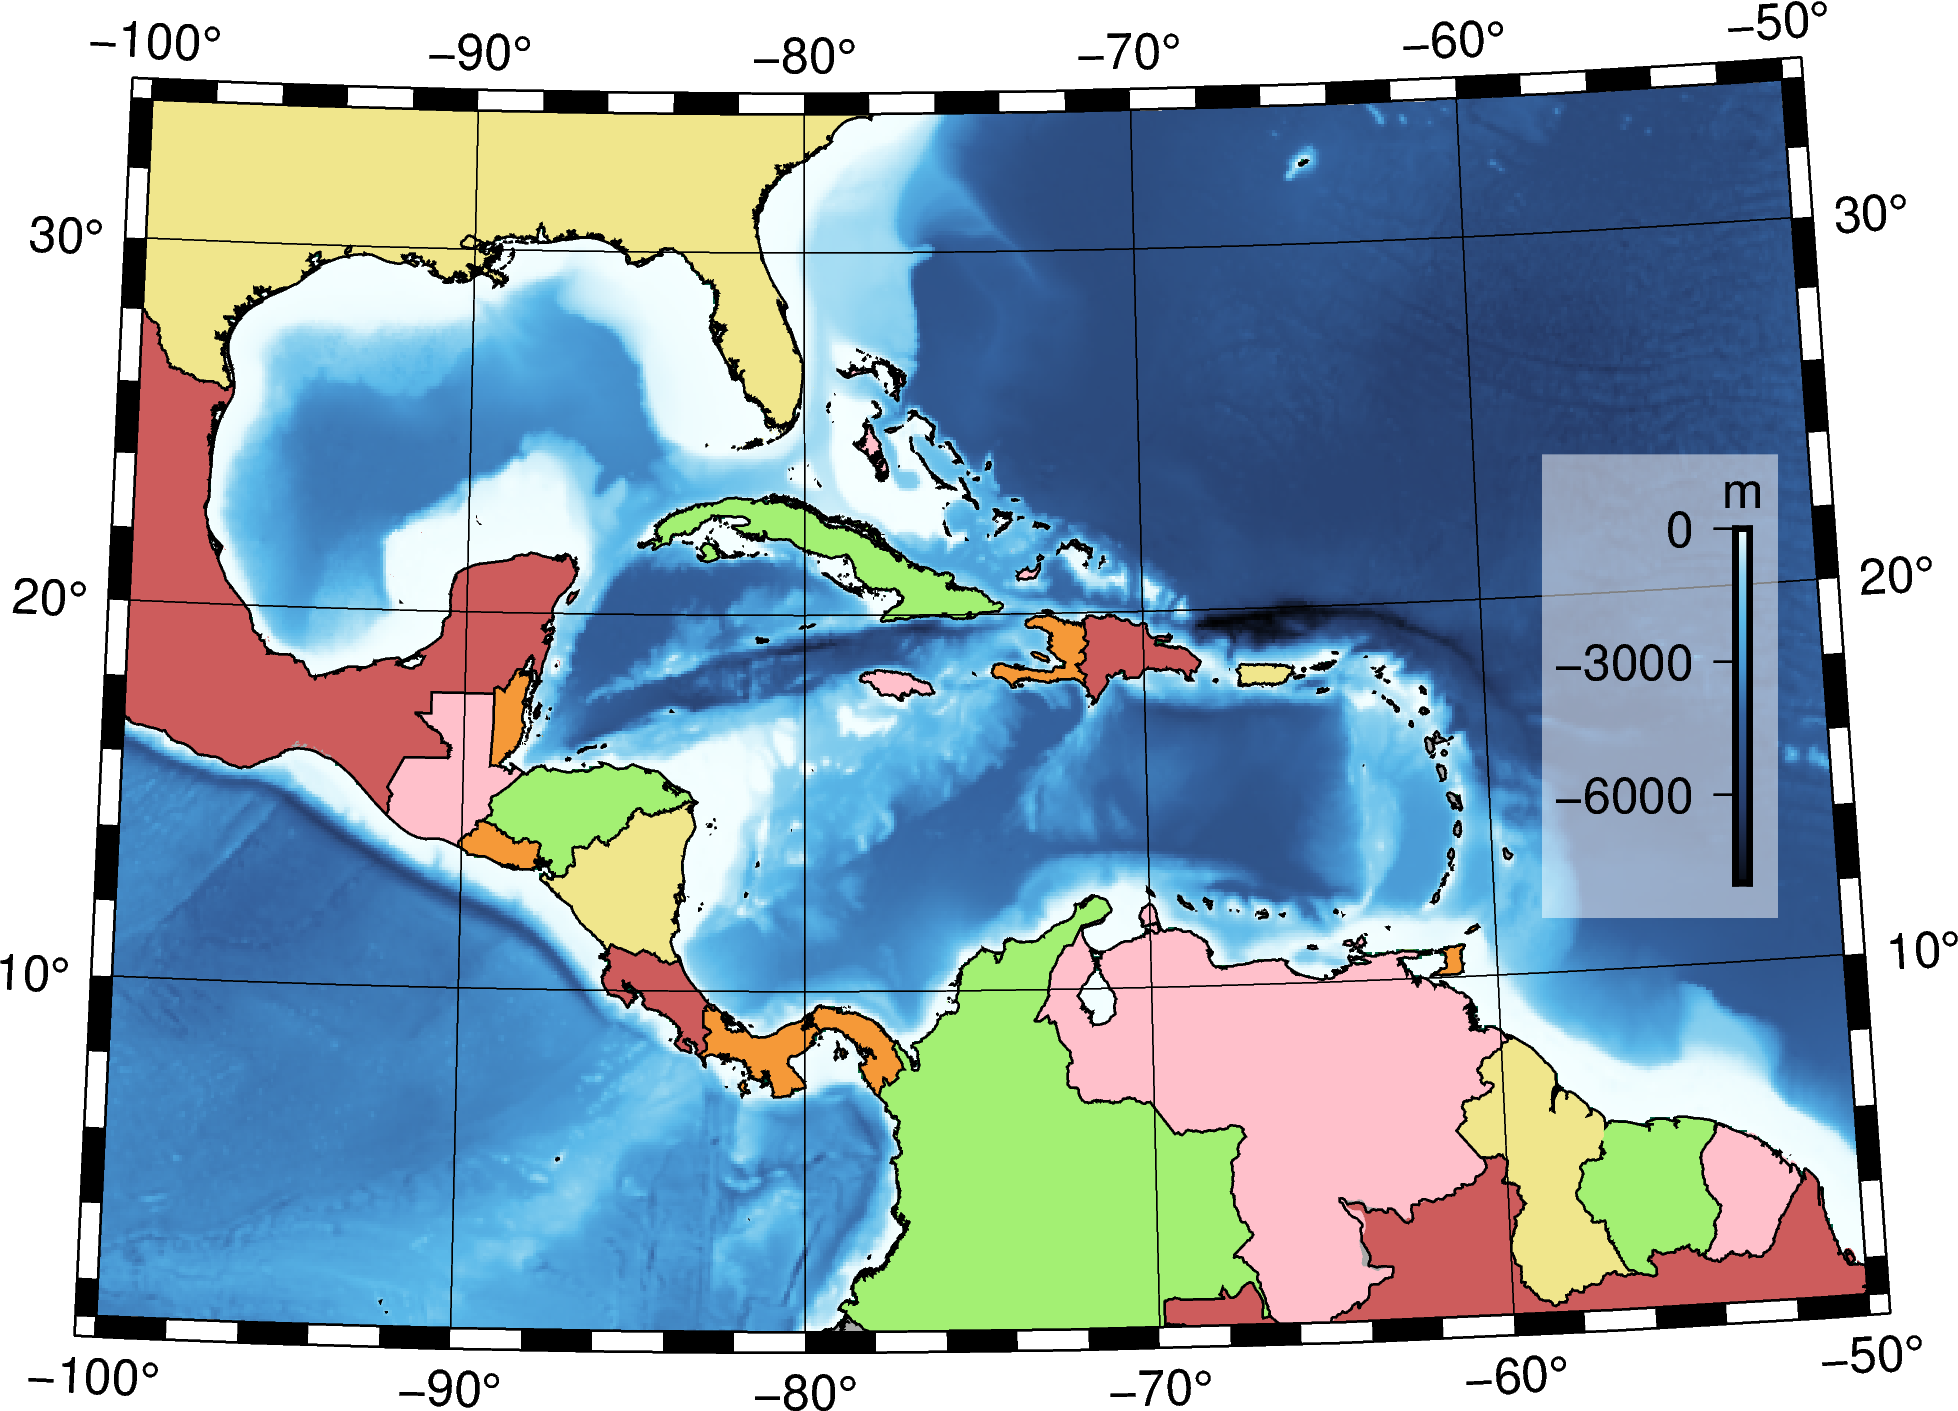

In [4]:
fig = pygmt.Figure()
fig.grdimage(grid, region=region, projection='B-80.27/8.58/-8/24/15c', cmap='geo')
fig.coast(land=color0, dcw=dcw_list)
fig.coast(shorelines='1/thinner', borders='1/thinner', resolution='i', frame='afg')
# Note that we added '+o1c/0' to the original position string for slightly shifting the colorbar!
fig.colorbar(position='jRM+w3c+o1c/0', truncate=[-8000, 0], frame=['x3000', 'y+lm'], box='+gwhite@50')
fig.show()


In [5]:
fig.savefig('central_america_pygmt.png')